<AxesSubplot:xlabel='year'>

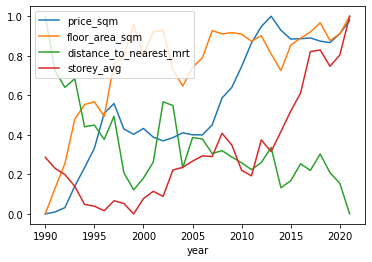

In [7]:
import numpy as np
import pandas as pd
import json
import requests
import re
import os
from datetime import datetime as dt
from pandas.io.json import json_normalize
import geocoder
import matplotlib.pylab as plt
import seaborn as sns
import shapefile
from sklearn import preprocessing
%matplotlib inline
from sklearn.preprocessing import MinMaxScaler

df_main_categ = pd.read_csv('df_main_categ.csv')

mms = MinMaxScaler()
df_by_year = df_main_categ[['price_sqm', 'floor_area_sqm','year','distance_to_nearest_mrt','storey_avg']].groupby('year').mean()
df_by_year[['price_sqm', 'floor_area_sqm','distance_to_nearest_mrt','storey_avg']] = mms.fit_transform(df_by_year[['price_sqm', 'floor_area_sqm','distance_to_nearest_mrt','storey_avg']])
df_by_year.plot()

#### rank the variance of the variable

In [8]:
from sklearn.feature_selection import VarianceThreshold

# var0_#### rank the variance of the variablefilter = VarianceThreshold(threshold=0.0)
# var0_filter.fit(df_final, y= df_final['price_sqm'])

# pd.DataFrame(df_final.columns[var0_filter.get_support()==False])

var5_filter = VarianceThreshold(threshold=0.05)
var5_filter.fit(df_main_categ, y= df_main_categ['price_sqm'])

pd.DataFrame(df_main_categ.columns[var5_filter.get_support()==False])

,0
0,toilet_number
1,town_BISHAN
2,town_BUKIT BATOK
3,town_BUKIT MERAH
4,town_BUKIT PANJANG
5,town_BUKIT TIMAH
6,town_CENTRAL AREA
7,town_CHOA CHU KANG
8,town_CLEMENTI
9,town_GEYLANG


#### However one-hot still useful